# Imports and loading the data

In [3]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [4]:
with open('feedback.txt') as f:
    alllines = f.readlines()

# Converting the Data into Usable form

In [5]:
#the structure is:
# contents :
#           tags (list)
#           difficulty (int)
#           quality(int)
# nomination (suggestion or demotion)
# problem id (int)

data = []
for line in alllines:
    k = json.loads(line)
    dataentry = []
    if 'contents' in k.keys():
        if 'tags' in k['contents'].keys():
            dataentry.append(k['contents']['tags'])
        else:
            dataentry.append([])
        if 'difficulty' in k['contents'].keys():
            dataentry.append(k['contents']['difficulty'])
        else:
            dataentry.append(-1)
        if 'quality' in k['contents'].keys():
            dataentry.append(k['contents']['quality'])
        else:
            dataentry.append(-1)
    else:
        dataentry.append([]).append(-1).append(-1)

    if 'nomination' in k.keys():
        dataentry.append(k['nomination'])
    else:
        dataentry.append('')

    if 'problem_id' in k.keys():
        dataentry.append(k['problem_id'])
    else:
        dataentry.append(-1)
    data.append(dataentry)
    
    
# in case data is missing, the replaced values are:
# tags : []
# difficulty: -1
#quality: -1
#nomination: ''
# problem_id: -1

In [6]:
dataset = np.array(data)

# Number of Quality Ratings , Difficulty Ratings , Tags Availible

In [7]:
total_feedbacks = len(dataset)

In [8]:
no_quality = np.sum(dataset[:,2]>0)
no_difficulty = np.sum(dataset[:,1]>0)
no_tags = np.sum(dataset[:,0]!= None)

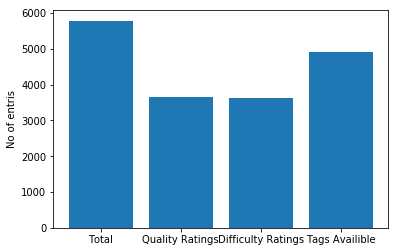

In [16]:
fig,ax = plt.subplots()
ax.bar(["Total","Quality Ratings","Difficulty Ratings","Tags Availible"],[len(dataset),no_quality,no_difficulty,no_tags])
ax.set_ylabel("No of entris")
plt.show()

# Number of problems with more than 5 suggestions

In [10]:
id_v_no_feedbacks = np.unique(dataset[:,4],return_counts = True)

In [11]:
more_than_5_feedbacks = np.sum(id_v_no_feedbacks[1]>5)

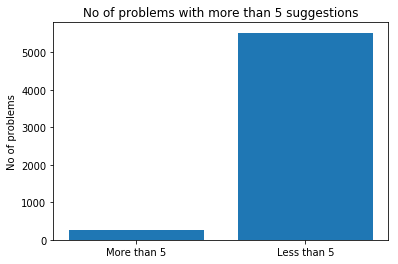

In [15]:
fig1 , ax1 = plt.subplots()
ax1.bar(["More than 5","Less than 5"],[more_than_5_feedbacks,total_feedbacks - more_than_5_feedbacks])
ax1.set_ylabel("No of problems")
ax1.set_title("No of problems with more than 5 suggestions")
plt.show()

In [18]:
no_feedbacks_vs_no_id = np.unique(id_v_no_feedbacks[1],return_counts = True)

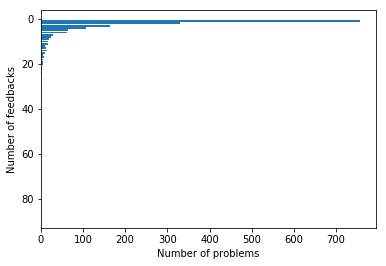

In [20]:
fig2,ax2 = plt.subplots()
ax2.barh(no_feedbacks_vs_no_id[0],no_feedbacks_vs_no_id[1])
ax2.invert_yaxis()
ax2.set_xlabel("Number of problems")
ax2.set_ylabel("Number of feedbacks")
plt.show()

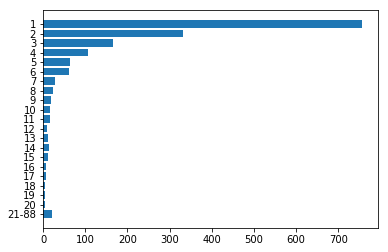

In [21]:
# the above plot looks messy so I grouped all between 21 and 80 together
fig3 , ax = plt.subplots()
s = [str(i) for i in range(1,21)]
s.append('21-88')

n = no_feedbacks_vs_no_id[1][:20]

n = np.append(n,np.sum(no_feedbacks_vs_no_id[1][20:]))

ax.barh(s,n)
ax.invert_yaxis()
plt.show()